**Phase 2: Support Vector Machines (SVM)**     
**Concepts:** Margin, kernels, linear/non-linear classification, Dimensionality Reduction using PCA       
**DATASET:** Credit card dataset: SVM Classification from Kaggle     
https://www.kaggle.com/code/pierra/credit-card-dataset-svm-classification

**Importing Libraries:**     
I've imported the essential Python libraries—Pandas, Seaborn, NumPy, Matplotlib, and Warnings—to handle data processing, visualization, numerical operations, and to suppress unwanted warnings during my analysis.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

**Mounting Google Drive:**   
I've mounted my Google Drive to access the dataset stored there directly from my Colab environment.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading the Dataset:**
I've loaded the Credit Card dataset from my Google Drive into a DataFrame and used df.info() to inspect its structure, including column names, data types, and the presence of any missing values.

In [3]:
df=pd.read_csv('/content/drive/MyDrive/ACM-TASKS/creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Data Preprocessing and Splitting:**      
I've dropped irrelevant columns (Time and Class from features), scaled the data using StandardScaler for normalization, and split it into training and testing sets while preserving the class distribution using stratify.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['Class', 'Time'])
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

**Training SVM with Linear Kernel:**      
I've trained an SVM model using the linear kernel to classify transactions and evaluated its performance using accuracy, with the prediction results stored for further analysis.

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy of Linear Kernal:", acc_linear)

Accuracy of Linear Kernal: 0.9992626663389628


**Training SVM with RBF Kernel:**      
I've trained an SVM model using the RBF (Radial Basis Function) kernel, which captures non-linear relationships in the data, and printed its accuracy on the test set.

In [7]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

acc_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy of rbf Kernal:", acc_rbf)

Accuracy of rbf Kernal: 0.999385555282469


**Training SVM with Polynomial Kernel:**      
I've trained an SVM model using the Polynomial kernel, which models polynomial decision boundaries, and evaluated its accuracy to compare with the linear and RBF kernels.

In [8]:
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

acc_poly = accuracy_score(y_test, y_pred_poly)
print("Accuracy of POlynomial Kernal:", acc_poly)

Accuracy of POlynomial Kernal: 0.9994557775359011


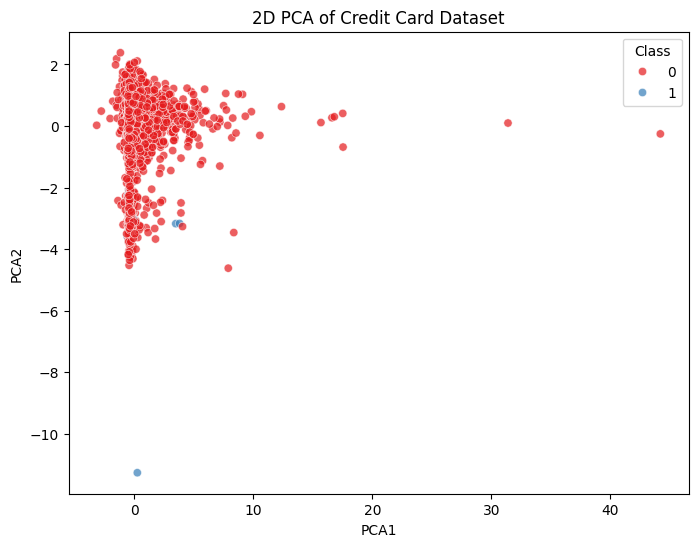

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df.sample(5000), x='PCA1', y='PCA2', hue='Class', palette='Set1', alpha=0.7)
plt.title("2D PCA of Credit Card Dataset")
plt.show()

In [11]:
results = pd.DataFrame({
    'Kernel': ['Linear', 'RBF', 'Polynomial'],
    'Accuracy': [acc_linear, acc_rbf, acc_poly]
})

print("\nACCURACY COMPARISION")
print(results)


ACCURACY COMPARISION
       Kernel  Accuracy
0      Linear  0.999263
1         RBF  0.999386
2  Polynomial  0.999456


**Result:**       
The Polynomial kernel gave the highest accuracy, slightly outperforming RBF and Linear kernels by capturing complex patterns better. However, all models performed similarly due to class imbalance in the dataset.


**Summary**    
I loaded the Credit Card Fraud dataset and explored its structure. After preprocessing by dropping irrelevant columns, scaling features, and splitting the data, I applied PCA to visualize the class distribution in 2D. Then, I trained three SVM classifiers using Linear, RBF, and Polynomial kernels. Finally, I compared their accuracies, observed that all performed well (with Polynomial slightly better), and noted that class imbalance influenced the high accuracy scores.
